Python Portfolio Optimization
* Source blog: https://www.analyticsvidhya.com/blog/2023/06/optimizing-portfolios-with-the-mean-variance-method-in-python/

* Data Source: Yahoo Finance NSE stock historical data
* Optimization for NIFTY select 8 stocks as per their Yahoo Finance Ticker symbol:
INFY.NS','TCS.NS','TATAMOTORS.NS','MARUTI.NS','SUNPHARMA.NS','CIPLA.NS','ITC.NS','MARICO.NS'

In [ ]:
!pip install pyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime
import yfinance as yf
yf.pdr_override()

%matplotlib inline

In [ ]:
# Set start as today & end date for 1 year stock history
import datetime
end_date = datetime.datetime.today()
start_date = end_date - datetime.timedelta(days = 5*365)

In [ ]:
# Define a function to get stock prices from yahoo finance
def get_stock_price(ticker):
    prices = web.get_data_yahoo(ticker,start_date,end_date)
    prices = prices["Adj Close"].dropna(how="all")
    return prices

In [ ]:
ticker_list = ['INFY.NS','TCS.NS','TATAMOTORS.NS','MARUTI.NS',
	'SUNPHARMA.NS','CIPLA.NS','ITC.NS','MARICO.NS']
portfolio = get_stock_price(ticker_list)

[*********************100%%**********************]  8 of 8 completed


In [ ]:
# Save dataframe to our portfolio
portfolio.to_csv("portfolio.csv",index=True)
portfolio = pd.read_csv("portfolio.csv",parse_dates=True,index_col="Date")

In [ ]:
portfolio.tail()

,CIPLA.NS,INFY.NS,ITC.NS,MARICO.NS,MARUTI.NS,SUNPHARMA.NS,TATAMOTORS.NS,TCS.NS
Date,,,,,,,,
2024-03-06,1485.250000,1617.550049,407.850006,505.649994,11567.049805,1604.000000,1017.650024,4064.300049
2024-03-07,1483.150024,1616.449951,413.549988,514.599976,11510.049805,1605.699951,1039.300049,4108.600098
2024-03-11,1504.099976,1600.599976,409.399994,509.200012,11395.549805,1593.599976,1028.000000,4122.350098
2024-03-12,1465.750000,1612.949951,404.450012,503.600006,11509.900391,1584.300049,1016.500000,4192.250000
2024-03-13,1471.250000,1611.400024,422.450012,496.149994,11390.150391,1558.599976,973.200012,4149.000000


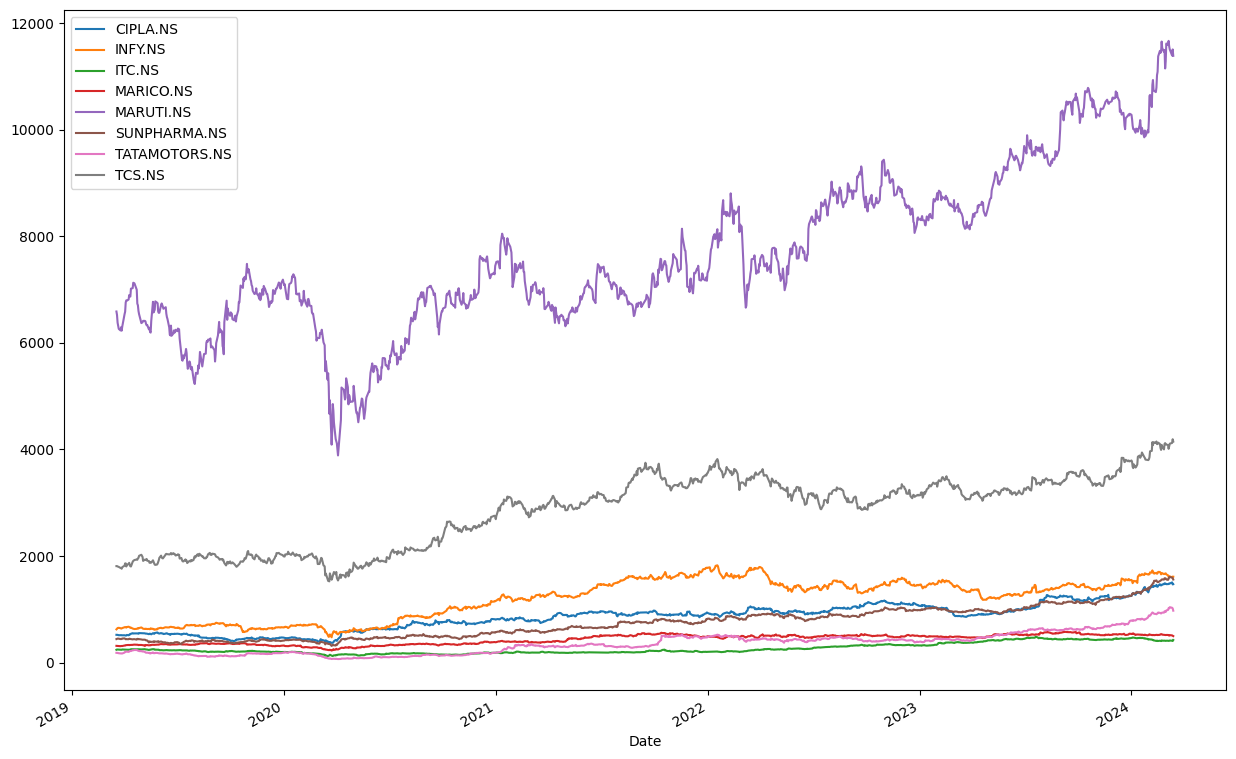

In [ ]:
portfolio[portfolio.index >= start_date].plot(figsize=(15,10));

In [ ]:
# Create Variance- Covariance Matrix
import pypfopt
from pypfopt import risk_models
from pypfopt import plotting

sample_cov = risk_models.sample_cov(portfolio, frequency=252)
sample_cov

,CIPLA.NS,INFY.NS,ITC.NS,MARICO.NS,MARUTI.NS,SUNPHARMA.NS,TATAMOTORS.NS,TCS.NS
CIPLA.NS,0.075920,0.015387,0.012328,0.013865,0.016286,0.036224,0.022461,0.013960
INFY.NS,0.015387,0.083787,0.015744,0.015400,0.023173,0.019846,0.038497,0.046461
ITC.NS,0.012328,0.015744,0.068898,0.016451,0.021298,0.019308,0.038394,0.014374
MARICO.NS,0.013865,0.015400,0.016451,0.058109,0.019694,0.017791,0.022844,0.011774
MARUTI.NS,0.016286,0.023173,0.021298,0.019694,0.097740,0.024397,0.069649,0.023409
SUNPHARMA.NS,0.036224,0.019846,0.019308,0.017791,0.024397,0.075275,0.037916,0.016511
TATAMOTORS.NS,0.022461,0.038497,0.038394,0.022844,0.069649,0.037916,0.222230,0.036612
TCS.NS,0.013960,0.046461,0.014374,0.011774,0.023409,0.016511,0.036612,0.061397


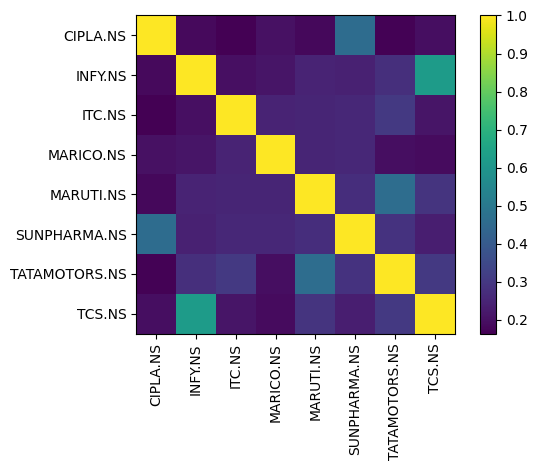

In [ ]:
# Visualize this as heat map
S = risk_models.CovarianceShrinkage(portfolio).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation=True);

In [ ]:
from pypfopt import expected_returns
mu = expected_returns.capm_return(portfolio)
mu

CIPLA.NS         0.194783
INFY.NS          0.238694
ITC.NS           0.195091
MARICO.NS        0.168955
MARUTI.NS        0.270318
SUNPHARMA.NS     0.229360
TATAMOTORS.NS    0.433693
TCS.NS           0.210081
Name: mkt, dtype: float64

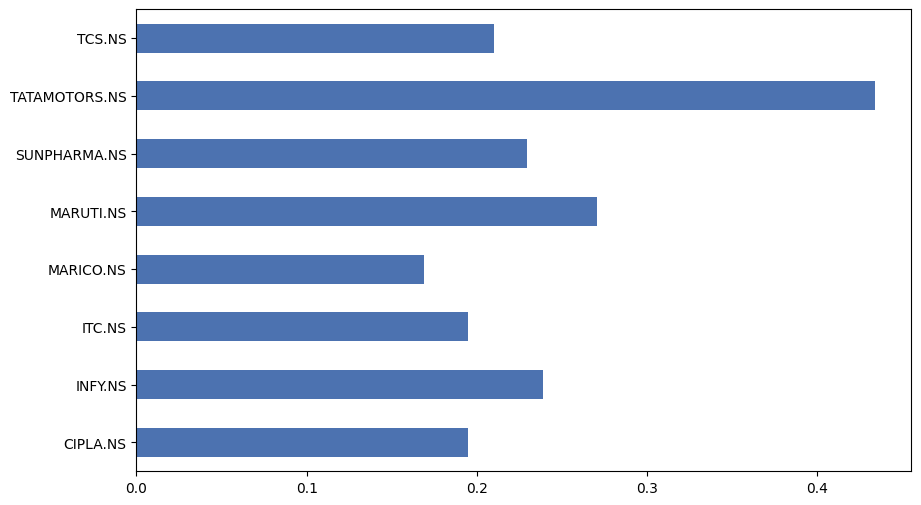

In [ ]:
mu.plot.barh(figsize=(10,6));

Now we’ll calculate the weights of each stock using the Efficient Frontier module. This considers the returns and volatility (standard deviation) of each stock in our portfolio. Then we calculate the maximum Sharpe Ratio. A higher Sharpe Ratio is achieved by balancing higher returns and lower risk. So we are computing the weights for the maximum Sharper Ratio.

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print(dict(cleaned_weights))

{'CIPLA.NS': 0.12447, 'INFY.NS': 0.12604, 'ITC.NS': 0.12393, 'MARICO.NS': 0.12326, 'MARUTI.NS': 0.1255, 'SUNPHARMA.NS': 0.12554, 'TATAMOTORS.NS': 0.12752, 'TCS.NS': 0.12374}


In [ ]:
ef.portfolio_performance(verbose=True)

Expected annual return: 24.3%
Annual volatility: 18.0%
Sharpe Ratio: 1.24


(0.24335145464060823, 0.17994739413654706, 1.2412041625405559)

Now, if we find our portfolio to be suitable based on the returns, risk, and shape ratio values, we can further compute how many shares of each stock to purchase. For example, if we had ₹1,00,000 to invest, then based on the weights we calculated in the previous steps and using the current stock prices, we can compute the number of shares of each stock you can purchase within the budget. With the help of DiscreteAllocation class, we can convert the continuous portfolio weights into discrete allocations using integer programming. DiscreteAllocation inputs three values: the continuous weights, the latest stock prices, and the assumed budget. Using the “get_latest_prices” class, we can extract the latest prices, from Yahoo Finance, for the chosen stocks in our portfolio. The output is a dictionary of each stock’s proposed number of shares to purchase and the value of unused funds.

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(portfolio)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=100000)

# Number of shares of each stock to purchase
allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: \u20B9{:.2f}".format(leftover))

Discrete allocation: {'TATAMOTORS.NS': 13, 'INFY.NS': 8, 'SUNPHARMA.NS': 8, 'MARUTI.NS': 1, 'CIPLA.NS': 9, 'ITC.NS': 29, 'TCS.NS': 3, 'MARICO.NS': 25}
Funds remaining: ₹255.20


Finally, let us plot the efficient frontier and the various computed shape ratios of our portfolio. Ideal, the portfolio’s max Sharpe ratio for a given risk value must fall on the efficient frontier line. We’ll also plot this max Sharpe ratio on our chart. We will consider a sample of 10,000 different portfolio weights and shape ratios to build an efficient frontier. And then compute a risk-return scatter plot.

In [ ]:
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds

print("Sample portfolio returns:", rets)
print("Sample portfolio volatilities:", stds)

Sample portfolio returns: [0.25172476 0.22412211 0.29936273 ... 0.2531411  0.23384009 0.21744031]
Sample portfolio volatilities: 0       0.199557
1       0.186138
2       0.244065
3       0.219294
4       0.187569
          ...   
9995    0.198895
9996    0.181178
9997    0.210119
9998    0.191305
9999    0.189272
Length: 10000, dtype: float64


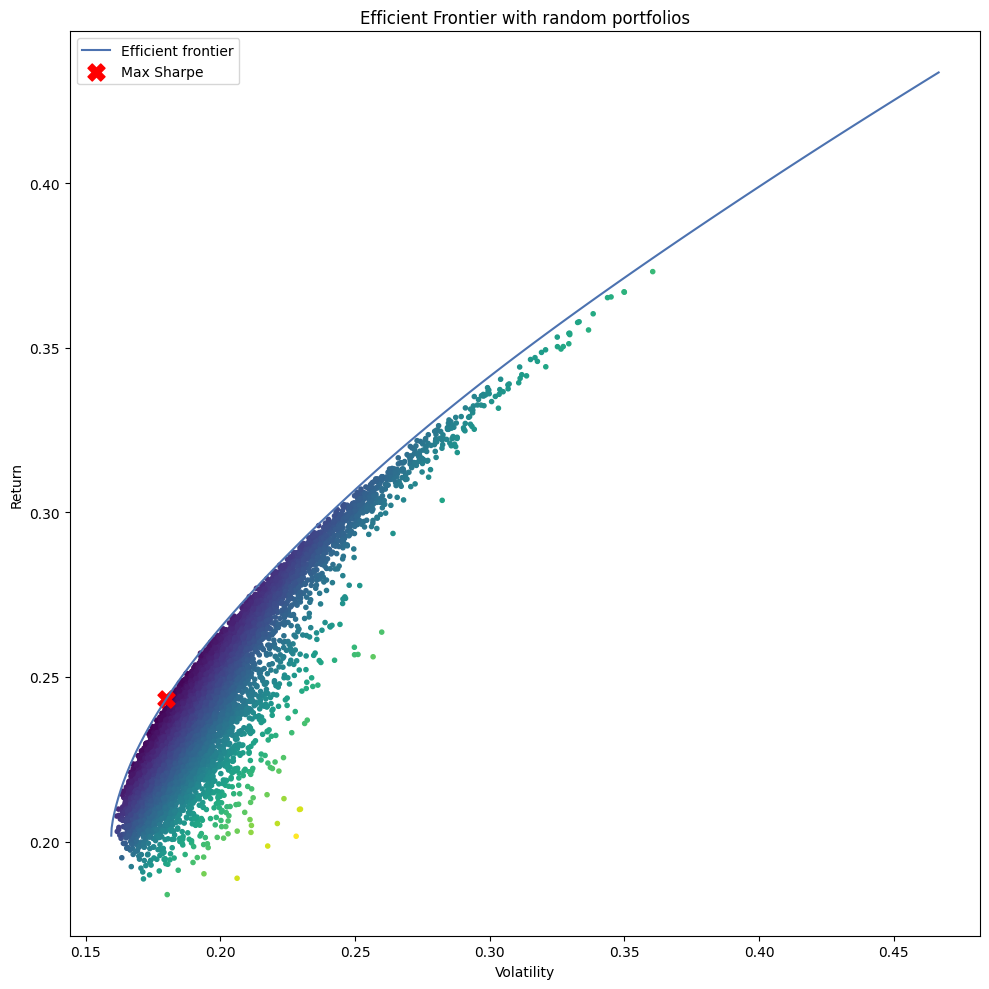

In [ ]:
# Plot efficient frontier with Monte Carlo sim
ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots(figsize= (10,10))
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find and plot the tangency portfolio
ef2 = EfficientFrontier(mu, S)
ef2.max_sharpe()
ret_tangent, std_tangent, _ = ef2.portfolio_performance()

# Plot random portfolios
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")
ax.scatter(std_tangent, ret_tangent, c='red', marker='X',s=150, label= 'Max Sharpe')

# Format
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.show()

**Conclusion**

You can easily adapt the mean-variance method in portfolio optimization to include additional industries such as automotive, IT, pharmacy, FMCG, and gold. For instance, constructing a portfolio of companies in energy, real estate, and commodities is also possible. This portfolio optimization method, while widely used, has certain limitations:

It is sensitive to input estimates of expected returns, variances, and covariances, which can be uncertain and subject to small changes.
Inaccurate estimates can lead to suboptimal portfolio allocations.
Additionally, mean-variance optimization assumes a normal distribution of asset returns, neglecting non-normal behavior, skewness, and kurtosis. This can result in inadequate consideration of tail risk.
The method also assumes linear relationships between asset returns, which may not capture the complexity of non-linear relationships, particularly in options or derivative instruments.
Furthermore, mean-variance optimization heavily relies on historical data, which may not accurately represent future market conditions, especially during structural changes or extreme events.
Alternative approaches can address these limitations. Resampling techniques, such as Monte Carlo simulation, account for uncertainty in input estimates. Downside risk measures like Conditional Value at Risk (CVaR) or higher moment-based models like the Black-Litterman model provide a more comprehensive analysis of risk and returns. However, this can be an encouraging guide in exploring different portfolio components and optimization methods.

**Frequently Asked Questions**

Q1. What is the mean-variance method?

A. The mean-variance method is an investment portfolio optimization approach that aims to find the optimal balance between risk and return. It quantifies risk as the variance of returns and seeks to maximize the portfolio’s expected return while minimizing its variance.

Q2. What are mean-variance optimization methods?

A. Mean-variance optimization methods are mathematical techniques used to construct efficient investment portfolios. They involve analyzing the expected returns and variances of different assets in order to allocate weights to each asset, aiming to achieve the highest possible return for a given level of risk.

Q3. How to calculate variance in python?

A. In Python, the variance can be calculated using various methods. One common approach is to use the NumPy library’s var() function, which computes the sample variance of an array or a specific axis of a multidimensional array. Another option is to manually calculate the variance using mathematical formulas.

Q4. What is the formula for the mean variance?

A. The formula for mean variance typically refers to the formula used to calculate the variance of a dataset. It involves taking the sum of the squared differences between each data point and the mean, dividing it by the total number of data points (or n-1 for sample variance), and represents the average squared deviation from the mean.

